In [46]:
import pandas as pd
import json
import os

In [47]:
dataset_dir = './train/original-microblog/'
data_list = []
for data in os.listdir(dataset_dir):
    js = json.load(open(os.path.join(dataset_dir, data), encoding='utf-8'))
    t = pd.json_normalize(js, sep='_')
    data_list.append(t)
df = pd.concat(data_list, axis=0, ignore_index=True)
df

,text,has_url,comments,pics,likes,time,reposts,mid,user_uid,user_verified,user_description,user_gender,user_messages,user_followers,user_location,user_time,user_friends,user_verified_type,user
0,【为了孩子，请拒吃转基因食品！】印度某地的羊吃了棉花收获后的草杆后，四分之一的羊死了，约5到...,False,306,1,1,1301754691,606,1U6k8lMp1y,1.155516e+09,False,True,m,7055.0,28319.0,上海,1.271574e+09,1985.0,-1.0,NaN
1,【中国缺少这样的少年英雄。应进中学语文课本】因拆迁款等问题与家人上访的16岁少年赵明阳将一名...,False,215,0,0,1295670050,555,2dKrkwjMIHC,1.173360e+09,True,True,m,18854.0,191425.0,海外 美国,1.251449e+09,658.0,0.0,NaN
2,期待这一天的到来#元畅依晨#隐婚三年终于曝光。。。。。哈哈哈哈哈哈元畅依晨你们神马都不用说、...,False,795,1,9,1296217427,4104,2dKrm0nZnZH,1.765139e+09,False,True,f,1741.0,4660.0,江苏 徐州,1.277876e+09,264.0,-1.0,NaN
3,懂得沙士比亞的計程車司機,False,185,1,46,1297572047,1189,2dKs0ywFoob,1.750361e+09,False,True,m,444.0,1478.0,香港,1.275556e+09,129.0,-1.0,NaN
4,【视频：陈佩斯主持《焦点访谈》】其实我们不知道，早期的《焦点访谈》曾经是由陈佩斯主持的，一开...,True,287,0,69,1299158904,957,2dKsGplwDPR,1.640601e+09,True,True,m,62318.0,7305697.0,北京 海淀区,1.251449e+09,2002.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,【四川绵阳市越狱46人 45男 1女 大多为90后 男性大多为强奸犯 女为杀人犯 南山下面一...,True,133,1,4,1370274687,346,zzLQSkl9W,1.779126e+09,False,True,f,1046.0,1625.0,四川 成都,1.279531e+09,570.0,220.0,NaN
4222,【“呵呵”——最恶心的聊天词汇，你中枪了么？】有人说，所有词语里最恶心的、最伤人的莫过于“呵...,False,169,1,15,1370274907,334,zzLSl4IL0,1.720963e+09,True,True,m,86209.0,7049685.0,湖北 武汉,1.269820e+09,978.0,3.0,NaN
4223,年轻时无论如何要确立一个目标。一克服懒惰消极靠目标。没目标就瞎混，一天到晚打牌玩游戏睡懒觉。...,False,108,0,65,1370049881,635,zznk2uq5w,1.194869e+09,True,True,m,7282.0,8239965.0,北京 海淀区,1.251448e+09,785.0,0.0,NaN
4224,牙膏底部的短线，绿色天然的。蓝色天然加药物，红色药物家化学，黑色纯化学。童鞋们~今后购买要记...,False,7,1,1,1370346065,108,zzTDJu6C4,2.094248e+09,True,True,f,16031.0,55139.0,黑龙江 哈尔滨,1.303181e+09,1823.0,3.0,NaN


In [48]:
non_rumors_dir = './train/non-rumor-repost'
rumors_dir = './train/rumor-repost'
for data in os.listdir(non_rumors_dir):
    mid = data.split('_')[0]
    df.loc[df['mid'] == mid, 'is_rumor'] = 0
for data in os.listdir(rumors_dir):
    mid = data.split('_')[0]
    df.loc[df['mid'] == mid, 'is_rumor'] = 1
df  

,text,has_url,comments,pics,likes,time,reposts,mid,user_uid,user_verified,user_description,user_gender,user_messages,user_followers,user_location,user_time,user_friends,user_verified_type,user,is_rumor
0,【为了孩子，请拒吃转基因食品！】印度某地的羊吃了棉花收获后的草杆后，四分之一的羊死了，约5到...,False,306,1,1,1301754691,606,1U6k8lMp1y,1.155516e+09,False,True,m,7055.0,28319.0,上海,1.271574e+09,1985.0,-1.0,NaN,1.0
1,【中国缺少这样的少年英雄。应进中学语文课本】因拆迁款等问题与家人上访的16岁少年赵明阳将一名...,False,215,0,0,1295670050,555,2dKrkwjMIHC,1.173360e+09,True,True,m,18854.0,191425.0,海外 美国,1.251449e+09,658.0,0.0,NaN,0.0
2,期待这一天的到来#元畅依晨#隐婚三年终于曝光。。。。。哈哈哈哈哈哈元畅依晨你们神马都不用说、...,False,795,1,9,1296217427,4104,2dKrm0nZnZH,1.765139e+09,False,True,f,1741.0,4660.0,江苏 徐州,1.277876e+09,264.0,-1.0,NaN,1.0
3,懂得沙士比亞的計程車司機,False,185,1,46,1297572047,1189,2dKs0ywFoob,1.750361e+09,False,True,m,444.0,1478.0,香港,1.275556e+09,129.0,-1.0,NaN,0.0
4,【视频：陈佩斯主持《焦点访谈》】其实我们不知道，早期的《焦点访谈》曾经是由陈佩斯主持的，一开...,True,287,0,69,1299158904,957,2dKsGplwDPR,1.640601e+09,True,True,m,62318.0,7305697.0,北京 海淀区,1.251449e+09,2002.0,3.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,【四川绵阳市越狱46人 45男 1女 大多为90后 男性大多为强奸犯 女为杀人犯 南山下面一...,True,133,1,4,1370274687,346,zzLQSkl9W,1.779126e+09,False,True,f,1046.0,1625.0,四川 成都,1.279531e+09,570.0,220.0,NaN,1.0
4222,【“呵呵”——最恶心的聊天词汇，你中枪了么？】有人说，所有词语里最恶心的、最伤人的莫过于“呵...,False,169,1,15,1370274907,334,zzLSl4IL0,1.720963e+09,True,True,m,86209.0,7049685.0,湖北 武汉,1.269820e+09,978.0,3.0,NaN,0.0
4223,年轻时无论如何要确立一个目标。一克服懒惰消极靠目标。没目标就瞎混，一天到晚打牌玩游戏睡懒觉。...,False,108,0,65,1370049881,635,zznk2uq5w,1.194869e+09,True,True,m,7282.0,8239965.0,北京 海淀区,1.251448e+09,785.0,0.0,NaN,0.0
4224,牙膏底部的短线，绿色天然的。蓝色天然加药物，红色药物家化学，黑色纯化学。童鞋们~今后购买要记...,False,7,1,1,1370346065,108,zzTDJu6C4,2.094248e+09,True,True,f,16031.0,55139.0,黑龙江 哈尔滨,1.303181e+09,1823.0,3.0,NaN,1.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                4226 non-null   object 
 1   has_url             4226 non-null   bool   
 2   comments            4226 non-null   int64  
 3   pics                4226 non-null   int64  
 4   likes               4226 non-null   int64  
 5   time                4226 non-null   object 
 6   reposts             4226 non-null   int64  
 7   mid                 4226 non-null   object 
 8   user_uid            4183 non-null   float64
 9   user_verified       4183 non-null   object 
 10  user_description    4183 non-null   object 
 11  user_gender         4183 non-null   object 
 12  user_messages       4183 non-null   float64
 13  user_followers      4183 non-null   float64
 14  user_location       4183 non-null   object 
 15  user_time           4183 non-null   float64
 16  user_f

In [50]:
df[df['user'].notnull()]

,text,has_url,comments,pics,likes,time,reposts,mid,user_uid,user_verified,user_description,user_gender,user_messages,user_followers,user_location,user_time,user_friends,user_verified_type,user,is_rumor
107,【#越南乳瓜#】神奇的越南乳瓜，神似女性的乳房，颜色略呈粉色。乳瓜成熟果实含葡萄糖、果糖、蔗...,False,168,1,26,Fri Aug 02 23:00:28 +0800 2013,205,A2VHCDJq4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
178,马航飞机失踪，李白早有预言。不信？看他《腾云》一诗：马腾驾祥云，航行阔海郡。失于蓬莱阁，踪迹...,True,68,1,18,Fri Mar 14 08:19:33 +0800 2014,245,AATFiF7g0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
225,#周一见# 马伊利真无辜，可怜，文章连道歉都是抄袭的，看我微博，有图有真相 ​,False,70,1,128,Mon Mar 31 20:25:25 +0800 2014,95,ADyGmCvG0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
327,- 北京的朋友转起 13969597919郑春蓉请求帮忙扩散，今天上午一个三岁小女孩在四惠怡...,False,29,0,39,Tue Jan 21 13:47:17 +0800 2014,116,At1AvdjiV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
369,朋友们远离穿这种图案服装的人，发给你的家人、爱人、朋友，如果见到请立即报警。 ​,False,173,2,84,Sun Mar 02 19:00:04 +0800 2014,446,Az8JlovuG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
3171,【 这个女人重新入党！】她——况丽，原新疆石油管理局教育培训中心党委副书记。94年克拉玛依大...,False,105,1,0,Fri Sep 14 04:42:25 +0800 2012,552,yBLOGwaCz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
3178,今日代表地球号召——【抵制蠢货！】（地球君支持抵制日货，但请别伤害他人，破坏他人财物，可以吗...,False,72,1,0,Fri Sep 14 11:11:07 +0800 2012,105,yBOmsvcFi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
3184,我们被骗了两次，一次是历史课本小括号里标记海参崴的地方，其实官方媒体和国家元首不敢叫海参崴，...,False,117,0,1,Wed Sep 12 00:06:38 +0800 2012,241,yBr9KyJ2u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
3196,爱尔兰瑞尔航空公司昨天公布的新LOGO。。。 有人可以解释一下伐。。。[bed凌乱] ​,False,40,1,0,Thu Sep 20 14:15:12 +0800 2012,213,yCK8a2Aao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0
3210,#广州#【广州游行打砸抢罪犯资料公布！居然是日本间谍！】 ​,False,151,1,1,Tue Sep 18 09:43:48 +0800 2012,444,yCpv0kFgR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,empty,1.0


In [51]:
demo = df[['mid', 'text', 'is_rumor']]
demo['is_rumor'] = demo['is_rumor'].astype('int64')
demo

C:\Users\Shen\AppData\Local\Temp\ipykernel_13488\45599169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['is_rumor'] = demo['is_rumor'].astype('int64')


,mid,text,is_rumor
0,1U6k8lMp1y,【为了孩子，请拒吃转基因食品！】印度某地的羊吃了棉花收获后的草杆后，四分之一的羊死了，约5到...,1
1,2dKrkwjMIHC,【中国缺少这样的少年英雄。应进中学语文课本】因拆迁款等问题与家人上访的16岁少年赵明阳将一名...,0
2,2dKrm0nZnZH,期待这一天的到来#元畅依晨#隐婚三年终于曝光。。。。。哈哈哈哈哈哈元畅依晨你们神马都不用说、...,1
3,2dKs0ywFoob,懂得沙士比亞的計程車司機,0
4,2dKsGplwDPR,【视频：陈佩斯主持《焦点访谈》】其实我们不知道，早期的《焦点访谈》曾经是由陈佩斯主持的，一开...,1
...,...,...,...
4221,zzLQSkl9W,【四川绵阳市越狱46人 45男 1女 大多为90后 男性大多为强奸犯 女为杀人犯 南山下面一...,1
4222,zzLSl4IL0,【“呵呵”——最恶心的聊天词汇，你中枪了么？】有人说，所有词语里最恶心的、最伤人的莫过于“呵...,0
4223,zznk2uq5w,年轻时无论如何要确立一个目标。一克服懒惰消极靠目标。没目标就瞎混，一天到晚打牌玩游戏睡懒觉。...,0
4224,zzTDJu6C4,牙膏底部的短线，绿色天然的。蓝色天然加药物，红色药物家化学，黑色纯化学。童鞋们~今后购买要记...,1


In [52]:
import jieba
import re
import unicodedata

def wordopt_cn(text):
    # Remove all non-Chinese characters
    text = re.sub('[^\u4e00-\u9fa5]', ' ', text)
    # Remove all URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove all HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove all punctuation
    text = ''.join(c for c in text if not unicodedata.category(c).startswith('P'))
    # Remove all digits
    text = re.sub('\d+', '', text)

    return text
demo['text'] = demo['text'].apply(lambda x: wordopt_cn(x))
demo['text'] = demo['text'].apply(lambda x: ' '.join(jieba.cut(x)))
demo['text'] = demo['text'].apply(lambda x: re.sub('\\s+', ' ', x))
demo

C:\Users\Shen\AppData\Local\Temp\ipykernel_13488\2705313641.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['text'] = demo['text'].apply(lambda x: wordopt_cn(x))
C:\Users\Shen\AppData\Local\Temp\ipykernel_13488\2705313641.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['text'] = demo['text'].apply(lambda x: ' '.join(jieba.cut(x)))
C:\Users\Shen\AppData\Local\Temp\ipykernel_13488\2705313641.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,mid,text,is_rumor
0,1U6k8lMp1y,为了 孩子 请 拒吃 转基因 食品 印度 某地 的 羊 吃 了 棉花 收获 后 的 草杆 ...,1
1,2dKrkwjMIHC,中国 缺少 这样 的 少年 英雄 应进 中学语文 课本 因 拆迁 款 等 问题 与 家人 ...,0
2,2dKrm0nZnZH,期待 这 一天 的 到来 元畅 依晨 隐婚 三年 终于 曝光 哈哈哈 哈哈哈 元畅 依晨 你...,1
3,2dKs0ywFoob,懂得 沙士比 亞的 計程車 司機,0
4,2dKsGplwDPR,视频 陈佩斯 主持 焦点访谈 其实 我们 不 知道 早期 的 焦点访谈 曾经 是 由 陈佩...,1
...,...,...,...
4221,zzLQSkl9W,四川 绵阳市 越狱 人 男 女 大多 为 后 男性 大多 为 强奸犯 女为 杀人犯 南山 ...,1
4222,zzLSl4IL0,呵呵 最 恶心 的 聊天 词汇 你 中枪 了 么 有人 说 所有 词语 里 最 恶心 的 ...,0
4223,zznk2uq5w,年轻 时 无论如何 要 确立 一个 目标 一 克服 懒惰 消极 靠 目标 没 目标 就 瞎 ...,0
4224,zzTDJu6C4,牙膏 底部 的 短线 绿色 天然 的 蓝色 天然 加 药物 红色 药物 家 化学 黑色 纯 ...,1


In [53]:
from sklearn.model_selection import train_test_split
x = demo['text']
y = demo['is_rumor']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

clf0=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

clf1 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])

clf2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

clf3 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('gbc', GradientBoostingClassifier())
])

clf4 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

                            Accuracy    Recall Precision  F1 Score
MultinomialNB               0.901608  0.901608  0.901976  0.901634
LogisticRegression          0.896878  0.896878  0.897746  0.896723
DecisionTreeClassifier      0.823084  0.823084  0.823607  0.823133
GradientBoostingClassifier  0.758751  0.758751  0.781716   0.75202
RandomForestClassifier      0.881741  0.881741  0.882996  0.881502


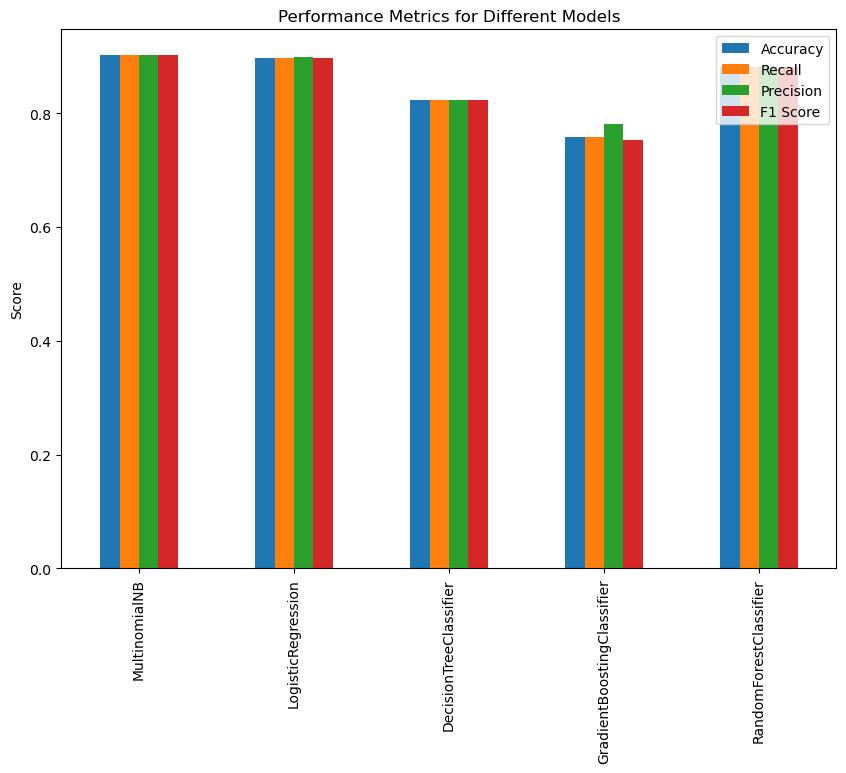

In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
# List of models
clfs = [clf0, clf1, clf2, clf3, clf4]

# Model names
clf_names = ['MultinomialNB', 'LogisticRegression', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier']

# Initialize a DataFrame to store the performance metrics
performance_metrics = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'], index=clf_names)

for clf, name in zip(clfs, clf_names):
    # Train the model
    clf.fit(x_train, y_train)

    # Predict the test set results
    y_pred = clf.predict(x_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the performance metrics in the DataFrame
    performance_metrics.loc[name, 'Accuracy'] = accuracy
    performance_metrics.loc[name, 'Recall'] = recall
    performance_metrics.loc[name, 'Precision'] = precision
    performance_metrics.loc[name, 'F1 Score'] = f1

# Print the performance metrics
print(performance_metrics)

# Plot the performance metrics
performance_metrics.plot(kind='bar', figsize=(10, 7))
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.show()

In [59]:
val = ["蛔虫美女问世了：现在有一种减肥的方法，不用运动不用节食：吃蛔虫卵。服用蛔虫卵后，蛔虫卵会在人体里孵化成虫，帮助房东消费食物，达到让房东瘦身的目的。这是英国《每日邮报》的新闻，说是通过服用蛔虫卵瘦身已被一些中国女大学生接受。真的假的？",
       "传说中的麦当劳全国通用无线上网密码，真的吗？","【“顶花”黄瓜或有猫腻，生长剂含避孕药】据青岛新闻网，顶着鲜艳黄花的黄瓜，通常在市场上受欢迎。但许多这样的黄瓜是用植物生长调节剂“扮嫩”的。有小贩爆料，黄瓜如果正常生长，采摘时早就谢，顶花黄瓜肯定是抹过药，甚至是避孕药配制的激素药。http://sinaurl.cn/h5IPDq","#有奖转发#【关注蚂蚁汇，赢imac大奖】参与方式：①关注蚂蚁汇②评论并转发本条微博③@ 5位以上好友。今天我们会抽取6名粉丝送出豆腐手机座或美妆体验一份！另外，再从评论尾数为4的粉丝中选一名，送出薇姿中样一份！本月全部活动结束后，将有大奖imac相送！想要拿奖的童鞋们，转起来吧！[欢欣鼓舞]","【6类杀精食物 吃傻下一代】一、炸鸡，含致癌物丙烯酰胺；二、啤酒，使尿酸沉积，肾小管阻塞肾脏衰竭；三、咖啡，压抑副交感神经减低性欲；四、豆腐，植物雌激素减少精子数；五、奶茶，反式脂肪酸减少男性荷尔蒙；六、腰子，含有重金属镉。不是吃啥补啥！！http://t.cn/heDXfi"]

for i in val:
    i = wordopt_cn(i)
    i = ' '.join(jieba.cut(i))
    i = re.sub('\\s+', ' ', i)
    print(i)
    for clf, name in zip(clfs, clf_names):
        print(name, clf.predict([i]))
    print()

蛔虫 美女 问世 了 现在 有 一种 减肥 的 方法 不用 运动 不用 节食 吃 蛔虫 卵 服用 蛔虫 卵后 蛔虫 卵会 在 人体 里 孵化 成虫 帮助 房东 消费 食物 达到 让 房东 瘦身 的 目的 这是 英国 每日 邮报 的 新闻 说 是 通过 服用 蛔虫 卵 瘦身 已 被 一些 中国 女 大学生 接受 真的假 的 
MultinomialNB [0]
LogisticRegression [0]
DecisionTreeClassifier [1]
GradientBoostingClassifier [0]
RandomForestClassifier [0]

传说 中 的 麦当劳 全国 通用 无线 上网 密码 真的 吗 
MultinomialNB [1]
LogisticRegression [1]
DecisionTreeClassifier [0]
GradientBoostingClassifier [0]
RandomForestClassifier [0]

 顶花 黄瓜 或 有 猫腻 生长 剂 含 避孕药 据 青岛 新闻网 顶 着 鲜艳 黄花 的 黄瓜 通常 在 市场 上 受欢迎 但 许多 这样 的 黄瓜 是 用 植物 生长 调节剂 扮嫩 的 有 小贩 爆料 黄瓜 如果 正常 生长 采摘 时 早就 谢 顶花 黄瓜 肯定 是 抹 过药 甚至 是 避孕药 配制 的 激素 药 
MultinomialNB [1]
LogisticRegression [0]
DecisionTreeClassifier [0]
GradientBoostingClassifier [0]
RandomForestClassifier [0]

 有奖 转发 关注 蚂蚁 汇 赢 大奖 参与 方式 关注 蚂蚁 汇 评论 并 转发 本条 微博 位 以上 好友 今天 我们 会 抽取 名 粉丝 送 出 豆腐 手机 座 或 美妆 体验 一份 另外 再 从 评论 尾数 为 的 粉丝 中选 一名 送 出薇 姿中样 一份 本月 全部 活动 结束 后 将 有 大奖 相 送 想要 拿奖 的 童鞋 们 转 起来 吧 欢欣鼓舞 
MultinomialNB [0]
LogisticRegression [0]
DecisionTreeClassifier [0]
GradientBoo